# **This is a LSTM based Fake News Classification - Accuracy : 99.8%**

**Table of Content** : 
>  1. **Importing Modules and loading data**
>  2. **Data Preporcessing**
>  3. **Understanding the Data by Visualizing**
>  4. **Data Cleaning**
>  5. **Data Preparing for the Model Training ( NLP )**
>  6. **Building the LSTM Model**
>  7. **Predicting the Results check the accuracy**


In [1]:
import nltk
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
# import keras
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model
import random
import math

In [2]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/Kagsot/


Mounted at /content/drive/
/content/drive/MyDrive/Kagsot


In [3]:
trb=pd.read_csv('trainbasekagsot.csv')
tbtm=pd.read_csv('test_base_&_train_metakagsot.csv')
tm = pd.read_csv('test_metakagsot.csv')
trb=trb.dropna()
tbtm=tbtm.dropna()
tm=tm.dropna()
trb['label']=trb['label'].astype(int)
tbtm['label']=tbtm['label'].astype(int)
tm['label']=tm['label'].astype(int)

<ipython-input-3-a97a1ee11521>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trb['label']=trb['label'].astype(int)
<ipython-input-3-a97a1ee11521>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tbtm['label']=tbtm['label'].astype(int)


In [ ]:
tr=pd.read_csv('subsetforbagkagsot.csv')
tst=pd.read_csv('testforbagkagsot.csv')
# r=pd.read_csv('realnews_collected_by_us.csv')
# trst=pd.concat([tst,r])

In [ ]:
tr=tr.dropna()
tr['label']=tr['label'].astype(int)
tst=tst.dropna()
tst['label']=tst['label'].astype(int)


<ipython-input-4-695a09b4cc9c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr['label']=tr['label'].astype(int)


In [ ]:
sz=len(tr)
def modifydatabag(t1):
  res=[]
  a=int(sz*0.90)
  start=0
  end=len(t1)
  for i in range(a):
    res.append(t1.iloc[random.randrange(start,end)])
  return res
#pass only test dataset for modification
data=modifydatabag(tr)

In [ ]:

df =pd.DataFrame(data,columns=['text','label'])
df['title_text']=df['text']
df.head(2)

,text,label,title_text
25450,Trump's tougher immigration policy extends to ...,1,Trump's tougher immigration policy extends to ...
11440,Trump Is ACTIVELY Working To RIP Families Awa...,0,Trump Is ACTIVELY Working To RIP Families Awa...


In [28]:
df_final=trb
df_test=tm

**Data Preporcessing**

In [ ]:
# plt.figure(figsize=(8,8))
# sns.countplot(y='subject', data = df_final )
# df_final.drop(columns = ['date','subject'], inplace = True)

In [29]:
df_final['news'] = df_final['text']
df_test['news'] = df_test['text']

**Understanding the Data**

**Data Cleaning**

In [ ]:
# df_final=df_final.drop(columns = ['title', 'text'])
# df_test=df_test.drop(columns = ['title', 'text'])

In [30]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
#defining stopwords
stop_words = stopwords.words('english')
stop_words.extend(['use', 're', 'edu', 'from', 'also'])

In [32]:
#function which stop words and the words less than 2 characters
def remove_stop_words (text):
  result = []
  text=str(text)
  for token in gensim.utils.simple_preprocess(text):
    if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
      result.append(token)

  return result

In [33]:
#remove stopwords from news column
df_final['clean_news'] = df_final['news'].apply(remove_stop_words)
df_test['clean_news'] = df_test['news'].apply(remove_stop_words)

In [ ]:
print(df_final['clean_news'][0])

['budget', 'fight', 'looms', 'republicans', 'flip', 'fiscal', 'script', 'washington', 'reuters', 'head', 'conservative', 'republican', 'faction', 'congress', 'voted', 'month', 'huge', 'expansion', 'national', 'debt', 'cuts', 'called', 'fiscal', 'conservative', 'sunday', 'urged', 'budget', 'restraint', 'keeping', 'sharp', 'pivot', 'republicans', 'representative', 'mark', 'meadows', 'speaking', 'face', 'nation', 'drew', 'hard', 'line', 'federal', 'spending', 'lawmakers', 'bracing', 'battle', 'january', 'return', 'holidays', 'wednesday', 'lawmakers', 'begin', 'trying', 'pass', 'federal', 'budget', 'fight', 'likely', 'linked', 'issues', 'immigration', 'policy', 'november', 'congressional', 'election', 'campaigns', 'approach', 'republicans', 'seek', 'control', 'congress', 'president', 'donald', 'trump', 'republicans', 'want', 'budget', 'increase', 'military', 'spending', 'democrats', 'want', 'proportional', 'increases', 'defense', 'discretionary', 'spending', 'programs', 'support', 'educati

In [34]:
#creating a list of words
list_of_words = []
for i in df_final.clean_news:
  for j in i:
    list_of_words.append(j)
for i in df_test.clean_news:
  for j in i:
    list_of_words.append(j)

In [35]:
#Total unique words
#finding the number of unique_words is needed to building the LSTM model
unique_words = len(list(set(list_of_words)))
unique_words

204193

In [36]:
#turn list of words to a string
df_final['clean_news_joined'] = df_final['clean_news'].apply(lambda x: " ".join(x))
df_final=df_final.drop(columns = ['clean_news', 'news'])
df_test['clean_news_joined'] = df_test['clean_news'].apply(lambda x: " ".join(x))
df_test=df_test.drop(columns = ['clean_news', 'news'])

**Data Preparing for the Model Training ( NLP )**

In [37]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [38]:
# length of maximum news
#finding the maximum number of words in a news is needed when we padding the tokenized data
maxlen = -1
for doc in df_final.clean_news_joined:
  tokens = nltk.word_tokenize(doc)
  if (maxlen < len(tokens)):
    maxlen = len(tokens)
for doc in df_test.clean_news_joined:
  tokens = nltk.word_tokenize(doc)
  if (maxlen < len(tokens)):
    maxlen = len(tokens)
print("The maximum number of words in a news is ", maxlen)

The maximum number of words in a news is  9298


In [ ]:
#splitting the Data
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(df_final.clean_news_joined, df_final.is_fake, test_size = 0.2)

In [39]:
#word tokernizing
from nltk import word_tokenize
tokenizer = Tokenizer(num_words = unique_words )
tokenizer.fit_on_texts(df_final.clean_news_joined)#here in case of tokenizer error
train_sequence = tokenizer.texts_to_sequences(df_final.clean_news_joined)
test_sequence = tokenizer.texts_to_sequences(df_test.clean_news_joined)

In [40]:
#Add padding
pad_train = pad_sequences(train_sequence, maxlen = 4406, padding = 'post', truncating = 'post' )
pad_test = pad_sequences(test_sequence, maxlen = 4406, padding = 'post')

**Building the LSTM Model**

In [41]:
def Bi_LSTM_modle():
  model = Sequential()
  model.add(Embedding(unique_words, output_dim = 256)),
  model.add(Bidirectional(LSTM(128)))
  model.add(Dense(128, activation = 'relu'))
  model.add(Dense(64, activation = 'relu'))
  model.add(Dense(1, activation = 'sigmoid'))

  model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['acc'])
  
  return model

In [42]:
import torch
model = Bi_LSTM_modle()
model.summary()
# model.cuda()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 256)         52273408  
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 52,708,865
Trainable params: 52,708,865
Non-trainable params: 0
__________________________________________

In [43]:
y_train = np.asarray(df_final.label)

In [44]:
#model training
model.fit(pad_train, y_train, batch_size = 64, validation_split = 0.1, epochs = 2)

Epoch 1/2
548/548 [==============================] - 322s 576ms/step - loss: 0.2153 - acc: 0.9112 - val_loss: 0.1689 - val_acc: 0.9364
Epoch 2/2
548/548 [==============================] - 295s 538ms/step - loss: 0.0736 - acc: 0.9747 - val_loss: 0.1849 - val_acc: 0.9343


**Predicting the Results check the accuracy**

In [45]:
#prediction
predicted_result = model.predict(pad_test)


448/448 [==============================] - 49s 107ms/step


In [46]:
#if predicted value > 0.5 its real else fake
prediction = []
for i in range (len(predicted_result)):
  if predicted_result[i].item() > 0.5:
    prediction.append(1)
  else:
    prediction.append(0)

In [23]:
df_test['label']=df_test['class']

KeyError: ignored

In [47]:
v=pd.read_csv('testmetakagsot.csv')
print(v)

       svm  nb  lg  cnn
0        0   0   0    0
1        1   0   1    1
2        0   0   0    0
3        1   1   1    1
4        1   1   1    1
...    ...  ..  ..  ...
14331    0   0   0    0
14332    1   0   1    1
14333    1   1   1    1
14334    0   0   0    0
14335    0   0   0    1

[14336 rows x 4 columns]


In [48]:
resdf = pd.DataFrame(prediction, columns=['label'])
v['lstm']=resdf['label']

In [49]:
print(v)

       svm  nb  lg  cnn  lstm
0        0   0   0    0     0
1        1   0   1    1     1
2        0   0   0    0     0
3        1   1   1    1     1
4        1   1   1    1     1
...    ...  ..  ..  ...   ...
14331    0   0   0    0     0
14332    1   0   1    1     1
14333    1   1   1    1     1
14334    0   0   0    0     0
14335    0   0   0    1     0

[14336 rows x 5 columns]


In [50]:
v.to_csv('testmetakagsot.csv',index=False)

In [ ]:
#accuracy
from sklearn.metrics import classification_report, accuracy_score , confusion_matrix
print(classification_report(df_test.label, prediction))
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(list(df_test.label), prediction)

print(accuracy)

              precision    recall  f1-score   support

           0       0.43      0.73      0.54       100
           1       0.13      0.04      0.06       102

    accuracy                           0.38       202
   macro avg       0.28      0.38      0.30       202
weighted avg       0.28      0.38      0.30       202

0.3811881188118812


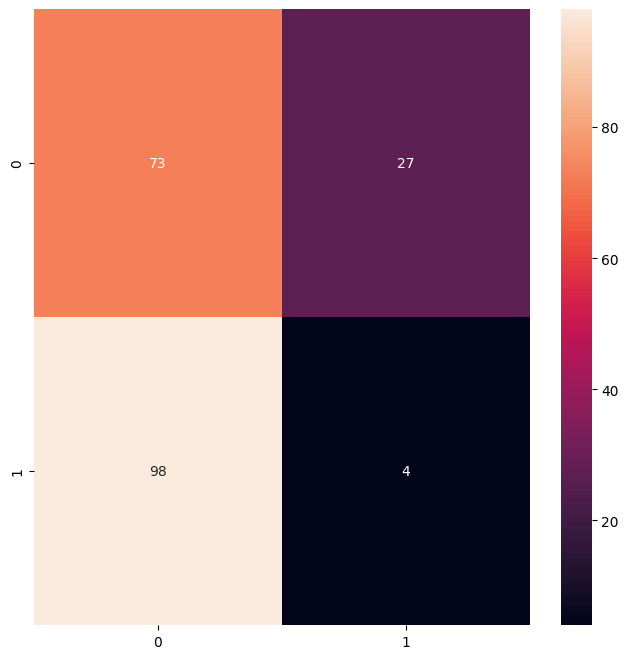

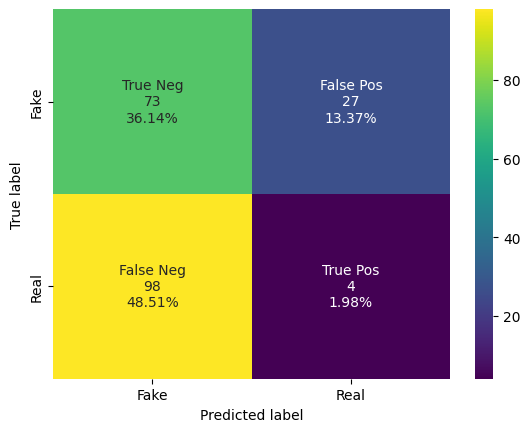

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(list(df_test.label), prediction)
plt.figure(figsize = (8,8))
sns.heatmap(cm, annot = True)

def make_confusion_matrix(cf, group_names=None, categories='auto', count=True, percent=True, cbar=True, xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False

    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('conf.pdf')  

    if title:
        plt.title(title)
labels=['True Neg','False Pos','False Neg','True Pos']
categories=['Fake','Real']
make_confusion_matrix(cm,group_names=labels,categories=categories,cmap='viridis')        